# 1. Load modules

In [1]:
%matplotlib widget 
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy import optimize
import os, sys
import xrdpy

# 2. Set up the xrd-file path

In [2]:
filepath = "/local/MyGitHub/xrdpy/tests/xrd_files/"
filename1 = "NT3330_RSM_w2T-2T-105AlN-AlGaN.xrdml"
filename2 = "NT3334C_RSM_w2T-2T-105AlN-AlGaN_fast.xrdml"
#filename2 = 'NT3285_RSM_w-2T_105AlGaN_calibration_fine.xrdml'

In [3]:
savefig = True
save_fig_path = '/local/MyGitHub/xrdpy/imgs/'

In [4]:
gen_fns = xrdpy.general_fns(print_log='low')
xrd_ = xrdpy.xrd(print_log='low')
xrd_plt = xrdpy.plottings(save_figure_dir=save_fig_path, print_log='low')

# 3. Set default variables

#### Variable source: https://www.ioffe.ru/SVA/NSM/Semicond/

In [5]:
alloy_type='ternary' 
structure_type='wz'

# Lattice parameters for AlN and GaN binaries
AlN_a, AlN_c = 3.112, 4.982
GaN_a, GaN_c = 3.189, 5.185    

# Cij parameters for AlN and GaN binaries
GaN_C13 = 106
GaN_C33 = 398
AlN_C13 = 108
AlN_C33 = 373

# Bowing parameters
bowing_a = 0.0
bowing_c = 0.0
bowing_C13 = 0.0
bowing_C33 = 0.0

# reciprocal axes are multiplited by this number to make enlarge axes
mul_fact = 10000

# a_lp_bin: [a_lattice_parameter bin_1, a_lattice_parameter bin_2, bowing]
# For ternary_wz we need followings: [a_lp_bin, c_lp_bin, c13_bin, c33_bin]
list_binary_parameters = [[AlN_a, GaN_a, bowing_a], [AlN_c, GaN_c, bowing_c],
                          [AlN_C13, GaN_C13, bowing_C13], [AlN_C33, GaN_C33, bowing_C33]]

# 4. Read xrd-file

## 4.1 Real space data

In [6]:
lambda_wavelength1, two_theta_values1, omega_values1, rsm_intesity1  = \
    xrd_.xrd_read_data(xrd_file_name=os.path.join(filepath, filename1))
#==========================================================================================
lambda_wavelength2, two_theta_values2, omega_values2, rsm_intesity2  = \
    xrd_.xrd_read_data(xrd_file_name=os.path.join(filepath, filename2))
#==========================================================================================
# X-ray wave number
R1 = 1/lambda_wavelength1
R2 = 1/lambda_wavelength2

Wavelength used: 1.5405980
Wavelength used: 1.5405980


## 4.2 Reciprocal space conversion

In [7]:
total_two_theta_in_row1 = np.shape(rsm_intesity1)[1]
rec_space_x1, rec_space_y1 = xrd_.Qxy(omega=omega_values1, two_theta=two_theta_values1,
                                      total_two_theta_in_row=total_two_theta_in_row1,
                                      R=R1, mul_fact=mul_fact)
#==========================================================================================
total_two_theta_in_row2 = np.shape(rsm_intesity2)[1]
rec_space_x2, rec_space_y2 = xrd_.Qxy(omega=omega_values2, two_theta=two_theta_values2,
                                      total_two_theta_in_row=total_two_theta_in_row2,
                                      R=R2, mul_fact=mul_fact)

# 5. Merge two plots

## 5.1 Plot them just side by side

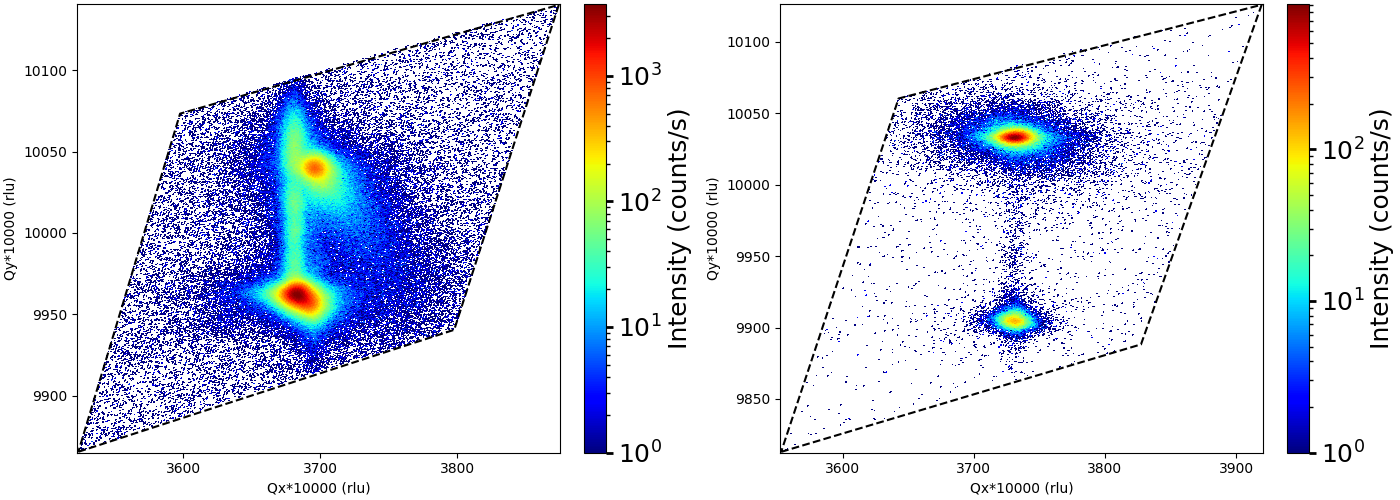

In [8]:
xlabel_text = f'Qx*{mul_fact} (rlu)'
ylabel_text = f'Qy*{mul_fact} (rlu)'
save_file_name = None

fig, axs = plt.subplots(1, 2, figsize=(14,5), constrained_layout=True)
#====================== Plot the map =================================
fig, _, _ = xrd_plt.xrd_plot(fig=fig, ax=axs[0], show_plot=False,
                              save_file_name=None, x_values=rec_space_x1, 
                              y_values=rec_space_y1, z_values=rsm_intesity1,
                              mode="reciprocal_space", xaxis_label=xlabel_text,
                              yaxis_label=ylabel_text, color_map='jet', color_scale='log',
                              colorbar_label='Intensity (counts/s)')
#====================== Plot the map =================================
fig, _, _ = xrd_plt.xrd_plot(fig=fig, ax=axs[1], 
                              save_file_name=None, x_values=rec_space_x2, 
                              y_values=rec_space_y2, z_values=rsm_intesity2,
                              mode="reciprocal_space", xaxis_label=xlabel_text,
                              yaxis_label=ylabel_text, color_map='jet', color_scale='log',
                              colorbar_label='Intensity (counts/s)')

## 5.2 Plot them just side by side but remove 2nd y-axis

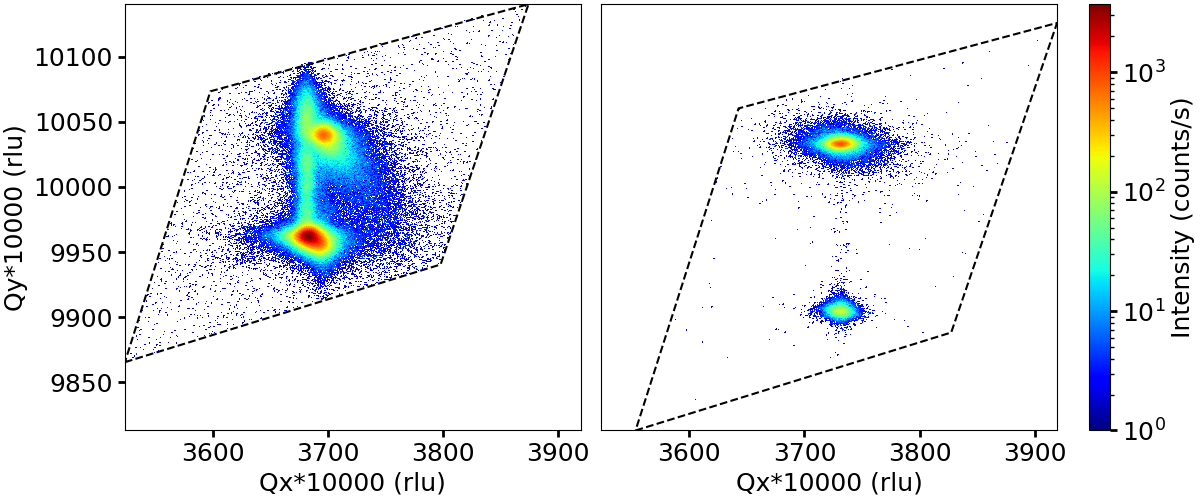

In [9]:
xlabel_text = f'Qx*{mul_fact} (rlu)'
ylabel_text = f'Qy*{mul_fact} (rlu)'

vmin, vmax = 1, max(rsm_intesity1.max(), rsm_intesity2.max()) # vmin can not be exatly 0.
threshold_intensity_ = 2

xmin, xmax = min(rec_space_x1.min(), rec_space_x2.min()), max(rec_space_x1.max(), rec_space_x2.max())
ymin, ymax = min(rec_space_y1.min(), rec_space_y2.min()), max(rec_space_y1.max(), rec_space_y2.max())

fig, axs = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

#====================== Plot the map =================================
fig, _, _ = xrd_plt.xrd_plot(fig=fig, ax=axs[0], show_plot=False,
                             Ymin=ymin, Ymax=ymax, Xmin=xmin, Xmax=xmax,
                              save_file_name=None, x_values=rec_space_x1, 
                              y_values=rec_space_y1, z_values=rsm_intesity1,
                              mode="reciprocal_space", xaxis_label=xlabel_text,
                             vmin=vmin, vmax=vmax, threshold_intensity=threshold_intensity_,
                              yaxis_label=ylabel_text, color_map='jet', color_scale='log',
                              colorbar_label='Intensity (counts/s)', show_colorbar=False)
axs[1].yaxis.set_visible(False)

#******************************************************************************************************
#====================== Plot the map =================================
fig, _, _ = xrd_plt.xrd_plot(fig=fig, ax=axs[1], Ymin=ymin, Ymax=ymax,
                             Xmin=xmin, Xmax=xmax, vmin=vmin, vmax=vmax,
                             x_values=rec_space_x2, show_plot=False,
                             y_values=rec_space_y2, z_values=rsm_intesity2,
                             mode="reciprocal_space", xaxis_label=xlabel_text,
                             threshold_intensity=threshold_intensity_,
                             yaxis_label='', color_map='jet', color_scale='log',
                             colorbar_label='Intensity (counts/s)')

## 5.3 Plot them in same plot
Note: in this case x-axis would be longer

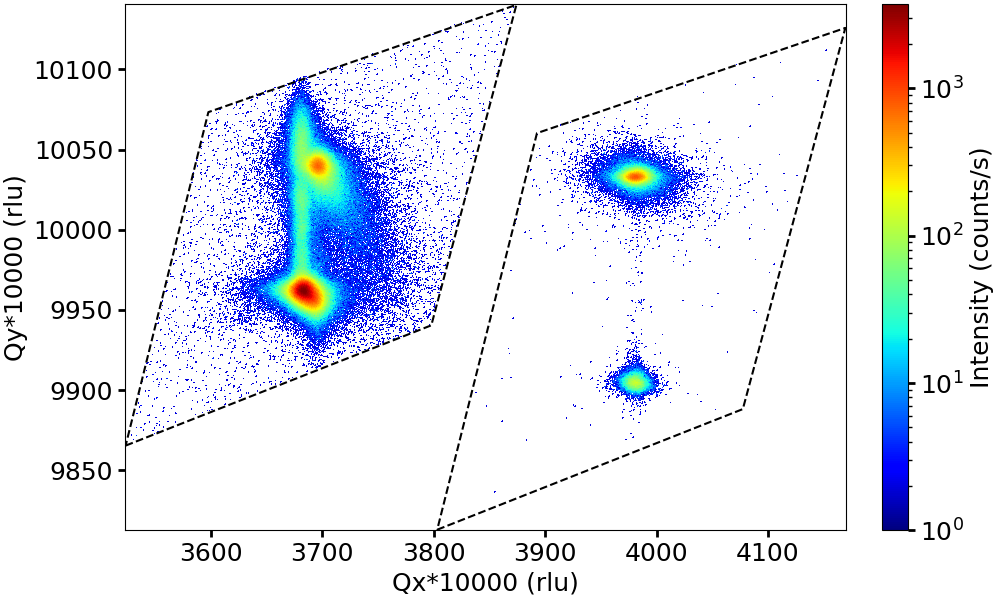

In [10]:
xlabel_text = f'Qx*{mul_fact} (rlu)'
ylabel_text = f'Qy*{mul_fact} (rlu)'

vmin, vmax = 1, max(rsm_intesity1.max(), rsm_intesity2.max()) # vmin can not be exatly 0.
threshold_intensity_ = 2
shift_2nd_plot = 250
#xmin, xmax = rec_space_x1.min(), rec_space_x_shift2.min()), max(rec_space_x_shift1.max(), rec_space_x_shift2.max())
#ymin, ymax = min(rec_space_y_shift1.min(), rec_space_y_shift2.min()), max(rec_space_y_shift1.max(), rec_space_y_shift2.max())

fig1, ax1 = plt.subplots(1, 1, figsize=(10,6), constrained_layout=True)

fig1, ax1, _ = xrd_plt.xrd_plot(fig=fig1, ax=ax1, save_file_name=None, x_values=rec_space_x1,
                                y_values=rec_space_y1, z_values=rsm_intesity1,
                                mode="reciprocal_space", xaxis_label=xlabel_text, 
                                yaxis_label=ylabel_text, vmin=vmin, vmax=vmax,
                                color_map='jet', show_plot=False, threshold_intensity=threshold_intensity_,
                                color_scale='log', show_colorbar=False)
fig1, ax1, _ = xrd_plt.xrd_plot(fig=fig1, ax=ax1, threshold_intensity=threshold_intensity_,
                                save_file_name=None, x_values=rec_space_x2+shift_2nd_plot,
                                y_values=rec_space_y2, z_values=rsm_intesity2,
                                vmin=vmin, vmax=vmax, mode="reciprocal_space", 
                                xaxis_label=xlabel_text, yaxis_label=ylabel_text, 
                                color_map='jet', color_scale='log',show_plot=False,
                                colorbar_label='Intensity (counts/s)')
